Import required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the csv file into a dataframe called dirty_data and display the top 5 rows.

In [4]:
dirty_data = pd.read_csv('dirty_data.csv')
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Get the Summary statistics of dirty_data.

In [17]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,25522.216000,76.658200,-35.835234,144.969494,10.890000,3.920967e+04,2.204224
std,86333.729169,14.481465,12.045393,0.022720,8.649134,2.741940e+05,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,6.392900e+02,0.107800
25%,7050.000000,65.982500,-37.818222,144.953488,5.000000,6.454735e+03,0.751425
50%,12807.500000,76.310000,-37.812165,144.965357,10.000000,1.129396e+04,1.030100
75%,20360.000000,82.555000,-37.805364,144.983985,15.000000,1.811919e+04,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,5.688270e+06,94.973400


In [ ]:
Check if columns contains null values.

In [5]:
dirty_data.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64

Return number of rows and columns in dirty_data.

In [13]:
print(f'The shape of dirty_data is: {dirty_data.shape}')

The shape of dirty_data is: (500, 16)


Analyze the data type of each column.

In [15]:
print(dirty_data.dtypes)

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object


Data type of the date column is object instead of datetime, So fixing this problem!

In [24]:
dirty_data['date'] = pd.to_datetime(dirty_data['date'], format='mixed')

In [25]:
print(dirty_data['date'].dtypes) # Now data in date column is in datetime64 form

datetime64[ns]


In [26]:
print(dirty_data.dtypes)

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object


Analyzing the order_id column to check whether if values are unique or not

In [27]:
if dirty_data['order_id'].is_unique :
    print("Data in order_id is unique")
else :
    print("Data in order_id is not unique")

Data in order_id is unique


In [35]:
dirty_data['nearest_warehouse'].value_counts()

nearest_warehouse
Thompson     197
Nickolson    184
Bakers       119
Name: count, dtype: int64

Analyzing the nearest warehouse column to check for unique values.

Thompson and thompson are same but here they both are different so make it same.
Similarly Nickolson and nickolson are same.

This will help the analysis to ensure all data are in the same format.
To solve this problem, convert data in nearest_warehouse in title case.

In [33]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

In [34]:
dirty_data['nearest_warehouse'] = dirty_data['nearest_warehouse'].str.title()

In [37]:
warehouses = dirty_data['nearest_warehouse'].value_counts()
print(warehouses)

nearest_warehouse
Thompson     197
Nickolson    184
Bakers       119
Name: count, dtype: int64


Visualizing data using a bar chart.

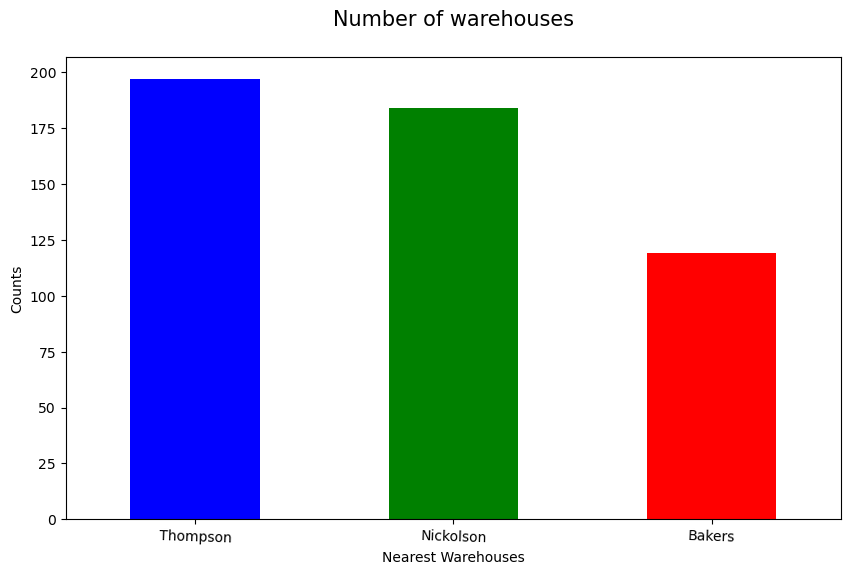

In [58]:
warehouses.plot(kind='bar', rot=-2, color=['b','g','r'], figsize=(10,6))
plt.title("Number of warehouses\n", size=15)
plt.ylabel("Counts")
plt.xlabel("Nearest Warehouses")
plt.show()

Visualizing data using a pie chart to get the percentage distribution.

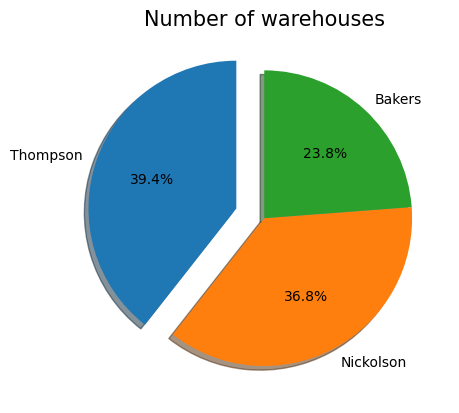

In [71]:
mylabels = ["Thompson", "Nickolson", "Bakers"]
myexplode = [0.2, 0, 0]

plt.pie(warehouses, 
        labels = mylabels, 
        autopct="%0.1f%%",
        explode = myexplode,
        startangle=90,radius=1,
        shadow = True)

plt.title("Number of warehouses", size=15)
plt.show() 

From the above charts, Thomson is nearest warehouse accessible to most customers.

Analyzing order_price and order_total
order_price: Price before any discounts and delivery charges are applied
order_total: Price after all discounts and/or delivery charges are applied

Displaying the record whose order price is maximum

In [5]:
dirty_data[dirty_data['order_price'] == dirty_data['order_price'].max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Thompson,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691,90.82,-37.809368,144.949342,10,9266.32,Summer,True,0.4187,work fine great product and no issues.,True


Displaying the record whose order price is minimum

In [6]:
dirty_data[dirty_data['order_price'] == dirty_data['order_price'].min()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
308,ORD165713,ID2384157684,2019-11-23,Bakers,"[('iStream', 2), ('Candle Inferno', 1)]",585,91.79,-37.800798,145.005428,25,639.29,Spring,True,1.361,junk had this thing for less than 2 months. ha...,False


Subsetting dirty data to display certain columns to check if the order_total (after all discount and delivery charges are applied) is correct or there is some errors in it.

In [7]:
dirty_data.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200,79.89,10,11059.89
1,9080,62.71,0,9142.71
2,10670,65.87,10,9668.87
3,24800,57.61,15,21137.61
4,9145,75.54,25,6934.29
5,7810,71.22,10,7100.22
6,13700,74.84,5,13089.84
7,7960,52.28,5,10789.79
8,25390,107.58,10,22958.58
9,13320,62.26,15,11384.26


Computing and Displaying order_total price of first 10 records, from the output, it indicates that there is an error in order_total column of dirty_data, so fixing this!

In [8]:
for i, index in enumerate(range(0,10)):
    if (dirty_data['coupon_discount'][i] != 0):
        dis_price = (dirty_data['order_price'][i]) * (dirty_data['coupon_discount'][i] / 100)   # apply coupon to original price
        price = dis_price + dirty_data['delivery_charges'][i]         # adding delivery charges
        final_price = np.round(dis_price,2)
    
    else:
        final_price = dirty_data['order_price'][i] + dirty_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place

    print(f'Order total of record at index {index} is: {final_price} ')

Order total of record at index 0 is: 1220.0 
Order total of record at index 1 is: 9142.71 
Order total of record at index 2 is: 1067.0 
Order total of record at index 3 is: 3720.0 
Order total of record at index 4 is: 2286.25 
Order total of record at index 5 is: 781.0 
Order total of record at index 6 is: 685.0 
Order total of record at index 7 is: 398.0 
Order total of record at index 8 is: 2539.0 
Order total of record at index 9 is: 1998.0 


Computing and appending order_final in 'new_list'

In [9]:
new_list = list()     # creating an empty list

In [10]:
for i in range(0,len(dirty_data['order_price'])):
    if (dirty_data['coupon_discount'][i] != 0):
        dis_price = (dirty_data['order_price'][i]) * (dirty_data['coupon_discount'][i] / 100)   # apply coupon to original price
        price = dis_price + dirty_data['delivery_charges'][i]         # adding delivery charges
        final_price = np.round(dis_price,2)
        new_list.append(final_price)               # appending final_price to lis
    
    else:
        final_price = dirty_data['order_price'][i] + dirty_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place
        new_list.append(final_price)                  # appending final_price to new_list

In [11]:
print(f'Items (Price) in list is: {len(new_list)}')

Items (Price) in list is: 500


Converting the list to Series and set the values to order_total

In [13]:
dirty_data['order_total'] = pd.Series(new_list)

Now the problem with order_total is solved!! The order_total column now displays the correct values after applying the discounts and/or delivery charges.

In [15]:
dirty_data.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200,79.89,10,1220.00
1,9080,62.71,0,9142.71
2,10670,65.87,10,1067.00
3,24800,57.61,15,3720.00
4,9145,75.54,25,2286.25
5,7810,71.22,10,781.00
6,13700,74.84,5,685.00
7,7960,52.28,5,398.00
8,25390,107.58,10,2539.00
9,13320,62.26,15,1998.00


Calculating the Inter Quartile Range (IQR) 

In [16]:
Q1_order_total = dirty_data['order_total'].quantile(0.25)     # Lower Quartile
Q3_order_total = dirty_data['order_total'].quantile(0.75)     # Upper Quartile
print(f'Lower Quartile is: {Q1_order_total}') 
print(f'Upper Quartile is: {Q3_order_total}')

Lower Quartile is: 860.375
Upper Quartile is: 5020.0


In [17]:
# upper quartile - lower quartile for Inter Quartile Range (IQR)

IQR_order_total = Q3_order_total - Q1_order_total    
print(f'Value of IQR_order_total is: {IQR_order_total}')

Value of IQR_order_total is: 4159.625


Calculating the lower and upper limits, any value less then the lower limit and greater then upper limit is an outlier.

In [18]:
lower_limit_order_total = Q1_order_total - 1.5 * IQR_order_total
upper_limit_order_total = Q3_order_total + 1.5 * IQR_order_total
print(f'Lower limit of order_total is: {lower_limit_order_total}')
print(f'Upper limit of order_total is: {upper_limit_order_total}')

Lower limit of order_total is: -5379.0625
Upper limit of order_total is: 11259.4375


Displaying all outlier values

In [19]:
outlier_dirty_data = dirty_data[(dirty_data['order_total'] < lower_limit_order_total) | (dirty_data['order_total'] > upper_limit_order_total)]

outlier_dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
10,ORD034800,ID4283908179,2019-08-03,Bakers,"[('Alcon 10', 2), ('pearTV', 2), ('iStream', 1...",31895,78.25,-37.811334,145.008678,0,31973.25,Winter,True,1.1919,i love this phone it is so user friendly and t...,True
12,ORD124395,ID0702352304,2019-02-11,Thompson,"[('Alcon 10', 1), ('Universe Note', 1), ('pear...",19010,94.75,-37.805433,144.941333,0,19104.75,Summer,True,0.9509,the cult's alive i love this little dummy-phon...,True
13,ORD255642,ID3085953531,2019-12-24,Nickolson,"[('iAssist Line', 2), ('Alcon 10', 1), ('pearT...",19710,75.64,-37.816166,144.975278,0,19785.64,Summer,True,0.5716,phone had a problem phone seemed great but con...,False
14,ORD496722,ID0589449820,2019-04-09,Nickolson,"[('pearTV', 2), ('iStream', 1), ('Lucent 330S'...",31900,79.78,-37.809463,144.972367,0,31979.78,Autumn,True,66.6483,"five stars good speed, like stanley",True
20,ORD178590,ID6167441029,2019-11-20,Thompson,"[('Candle Inferno', 1), ('Toshika 750', 2), ('...",13710,77.61,-37.809311,145.018595,0,13787.61,Spring,False,1.2791,love it. perfect. the battery life is at 94% w...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,ORD033121,ID0777768981,2019-05-17,Thompson,"[('Olivia x460', 1), ('pearTV', 2), ('Universe...",20745,67.67,-37.806155,144.958304,0,20812.67,Autumn,False,1.2259,worth it fantastic worth every penny,True
487,ORD234473,ID0127674021,2019-07-04,thompson,"[('Candle Inferno', 1), ('Toshika 750', 2), ('...",33870,77.06,-37.802392,144.998158,0,33947.06,Winter,True,0.8848,misses phone calls i love the features. you ge...,True
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,38677.60,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,03-28-2019,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False


In [20]:
print(f'Total outlier records in dirty_data is: {outlier_dirty_data.shape[0]}')

Total outlier records in dirty_data is: 72


Displaying all regular (non-outlier) values

In [24]:
regular_dirty_data = dirty_data[(dirty_data['order_total'] > lower_limit_order_total) & (dirty_data['order_total'] < upper_limit_order_total)]
regular_dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,1220.00,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,1067.00,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,3720.00,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,2286.25,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,ORD082002,ID0246439398,2019-12-08,Nickolson,"[('Olivia x460', 2), ('Universe Note', 1), ('i...",6200,73.85,-37.810542,144.972018,5,310.00,Summer,False,0.9223,"as good as the others, but half the price real...",True
493,ORD034351,ID6167231003,2019-04-05,Bakers,"[('Candle Inferno', 2), ('pearTV', 1), ('iStre...",25370,66.41,-37.818888,144.953887,10,2537.00,Autumn,False,0.9154,its a mini computer great android,True
494,ORD379700,ID2190564628,2019-08-05,Nickolson,"[('Candle Inferno', 1), ('Alcon 10', 1), ('Luc...",17510,75.37,-37.816209,144.964057,5,875.50,Winter,True,0.5513,"good quality price ratio bought it for my mom,...",True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,503.00,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


In [28]:
print(f'Total number of non-outlier records in dirty_data is: {regular_dirty_data.shape[0]}')

Total number of non-outlier records in dirty_data is: 428


In [31]:
regular_dirty_data.head().sort_values('order_price', ascending = False)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,3720.00,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,1220.00,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,1067.00,Autumn,False,1.0949,five stars this is a great cheap phone.,True
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,2286.25,Spring,False,0.5867,four stars good,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False


Analyzing how many customers are happy / satisfied with service.

In [33]:
regular_dirty_data['is_happy_customer'].unique()

array([ True, False])

In [38]:
sentiment = regular_dirty_data['is_happy_customer'].value_counts()
sentiment

is_happy_customer
True     301
False    127
Name: count, dtype: int64

Visualizing the customer satisfaction data using a bar chart and pie chart.

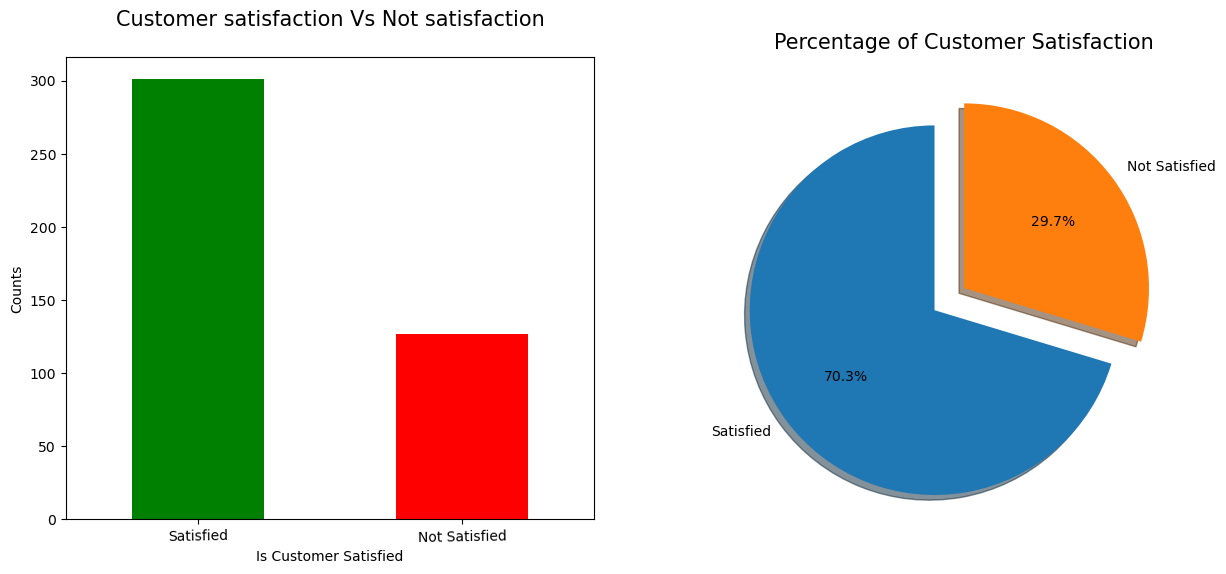

In [53]:
plt.figure(figsize=(15,6))

plt.subplot(121)
sentiment.plot(kind='bar', color=['g','r'], rot=1)
plt.xticks(range(2), labels=['Satisfied','Not Satisfied'])
plt.xlabel('Is Customer Satisfied')
plt.ylabel('Counts')
plt.title("Customer satisfaction Vs Not satisfaction\n", size=15)


mylabels = ["Satisfied", "Not Satisfied"]
myexplode = [0.2, 0]


plt.subplot(122)

plt.pie(sentiment, 
        labels = mylabels, 
        autopct="%0.1f%%",
        explode = myexplode,
        startangle=90,radius=1,
        shadow = True)

plt.title("Percentage of Customer Satisfaction", size=15)
plt.show() 

From the analysis, 70% of customers are satisfied with service.